## Instructions

This homework consists of 6 major tasks listed below (as a reminder - we start indexing at 0). The number of points granted for each task and subtask is given in this text and in the appropriate cells. Some tips are also given within the task explanation text. Please read everything carefully.

### Task list

#### 0. Understand the problem  [1 Point]
Explain in one-two paragraphs the dataset, and what type of ML algorithms are applicable on this dataset.

#### 1. Exploratory data analysis  [1 Point]
Some basic data stastics and information.

#### 2. Missing values  [1 Point]
Detect and display the total number on NaN values in the dataset, and variables that have NaN values.

#### 3. Visual exploratory data analysis, incl. detecting outliers [1 Point]
Display histograms and box plots of all numerical features.

#### 4. Data standardisation [3 Points]
Two different methods for data standardisation, covered in the lectures, are to be implemented here.

#### 5. Data transformation [3 Points + 2 Bonus Points]
Two different methods for data transformation, covered in the lectures, are to be implemented here.
Additonally, a data transformation method that was not mentioned in the lecture is added here as a bonus task that can add 2 bonus points to the total score.

### General note

* Columns = variables = features
* Raws = feature vectors
* The howework shall be done in view of this jupyter notebook. Please do not add additional files. If there is a discussion of results required, please use a markdown cell in this notebook to do so.

### Submission

* For submission all notebook cells must be evaluated. 
* Please name your homowerk like this: MLOT2023-Homework_Asignment_YYYYMMDD_LastName.ipynb (YYYYMMDD should be the date of your submission, and the LastName your last name).
* Submit this assignment via Moodle at latest on December 1st, 2023 

### Grading
* In total you can get 10 points if all requirements are entirely met. In order to succeed you need at least 5 point.

* Bonus points
    + An additional data transformation method that was not mentioned in the lecture is added here as a bonus task that can add 2 bonus points to the total score.



In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import os
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from feature_engine.transformation import BoxCoxTransformer

In [6]:
## load dataset
from sklearn import datasets

## Uncomment your dataset

## Student No. 1
#Selected_dataset = datasets.fetch_california_housing()

## Student No. 2
#Selected_dataset = datasets.load_iris()

## Student No. 3
#Selected_dataset = datasets.load_diabetes()

## Student No. 4
#Selected_dataset = datasets.load_linnerud()

## Student No. 5
#Selected_dataset = datasets.load_wine()

## Student No. 6
#Selected_dataset = datasets.fetch_covtype()

## Student No. 7
#Selected_dataset = datasets.fetch_kddcup99()

## Student No. 8
Selected_dataset = datasets.fetch_openml(name="house_prices", as_frame=True)

## Student No. 9
#Selected_dataset = datasets.load_breast_cancer
print(Selected_dataset)


{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorc

## 0. Understand the problem [1 Point]

TODO 0.1 Explain in one-two paragraphs the dataset, and what type of ML algorithms are applicable to this dataset. [1 Point]

Useful link: [https://scikit-learn.org/stable/datasets.html]

Base on the lecture note the type of data set used here is a combined data set because it have n_samples * n_features, as it have more than one parameters which is used to determine the house prices. The type of algorithim used is A learning algorithm, which adjust based on the wieght of the input data. 

## 1. Exploratory data analysis  [1 Point]

In [7]:
# TODO 1.1 Transform data from np array to pandas dataframe [0,5 Points]
# Tip - do not fortet to add 'target' array as the last column to the dataframe, with the name 'Target'.
# Some more tips:
# print(Selected_dataset.data)
# print(Selected_dataset.target)
#print(Selected_dataset.feature_names)
pandas_dataframe = pd.DataFrame(Selected_dataset.data, columns=Selected_dataset.feature_names)
pandas_dataframe['Target'] = Selected_dataset.target
print(pandas_dataframe)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [8]:
# TODO 1.2 Display shape, 7 heading and 6 last rows of data [0,1 Points]
# pandas_dataframe.shape
print(pandas_dataframe.head(7), pandas_dataframe.tail(6))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...    

In [9]:
# TODO 1.3 Display feature names [0,1 Points]
print(Selected_dataset.feature_names)
# print(pandas_dataframe.columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [10]:
# TODO 1.4 Display feature/data types [0,1 Points]
pandas_dataframe.dtypes
# pandas_dataframe.info()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Target             int64
Length: 81, dtype: object

In [11]:
# TODO 1.5 Display basic statistics, including min, max, mean, std... [0,1 Points]
pd_dataframe_describe = pandas_dataframe.describe()
print(pd_dataframe_describe)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [12]:
# TODO 1.6 Display count of the values of the feature 'Target' [0,1 Points]
pandas_dataframe['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

## 2. Missing values  [1 Point]

In [13]:
# TODO 2.1 Detect and display the total number on NaN values in the dataset. [0,5 Points]
# pandas_dataframe.isna().sum().sum
pandas_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# TODO 2.2 Detect variables that have NaN values. [0,5 Points]
pandas_dataframe.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Target             0
Length: 81, dtype: int64

In [15]:
pandas_dataframe['Alley'].isna().sum()

1369

## 3. Visual exploratory data analysis  [1 Point]

In [16]:
# TODO 3.1 Display boxplot subplots for all applicable features [0,5 Points]
# Creating boxplot subplots 
boxplots = pandas_dataframe.boxplot(figsize=(100,100))
plt.show()

In [17]:
# TODO 3.2 Display histogram subplots for all applicable features [0,5 Points]
pd_dataframe_hist = pandas_dataframe.hist(figsize=(100,100))
plt.show()



## 4. Data standardisation  [3 Points]

In [18]:
from sklearn.preprocessing import StandardScaler

# TODO 4.1 Data standardisation sensu stricto [1,5 Points]
# Scale data using in a way that mean equals to zero and standard deviation equals to one
# Display box plots of the scaled data frame to see results
# Select only numerical features for scaling
numerical_features = pandas_dataframe.select_dtypes(include=[np.number]).drop(columns=['Id', 'Target'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled data
scaled_dataframe = pd.DataFrame(scaled_data, columns=numerical_features.columns)



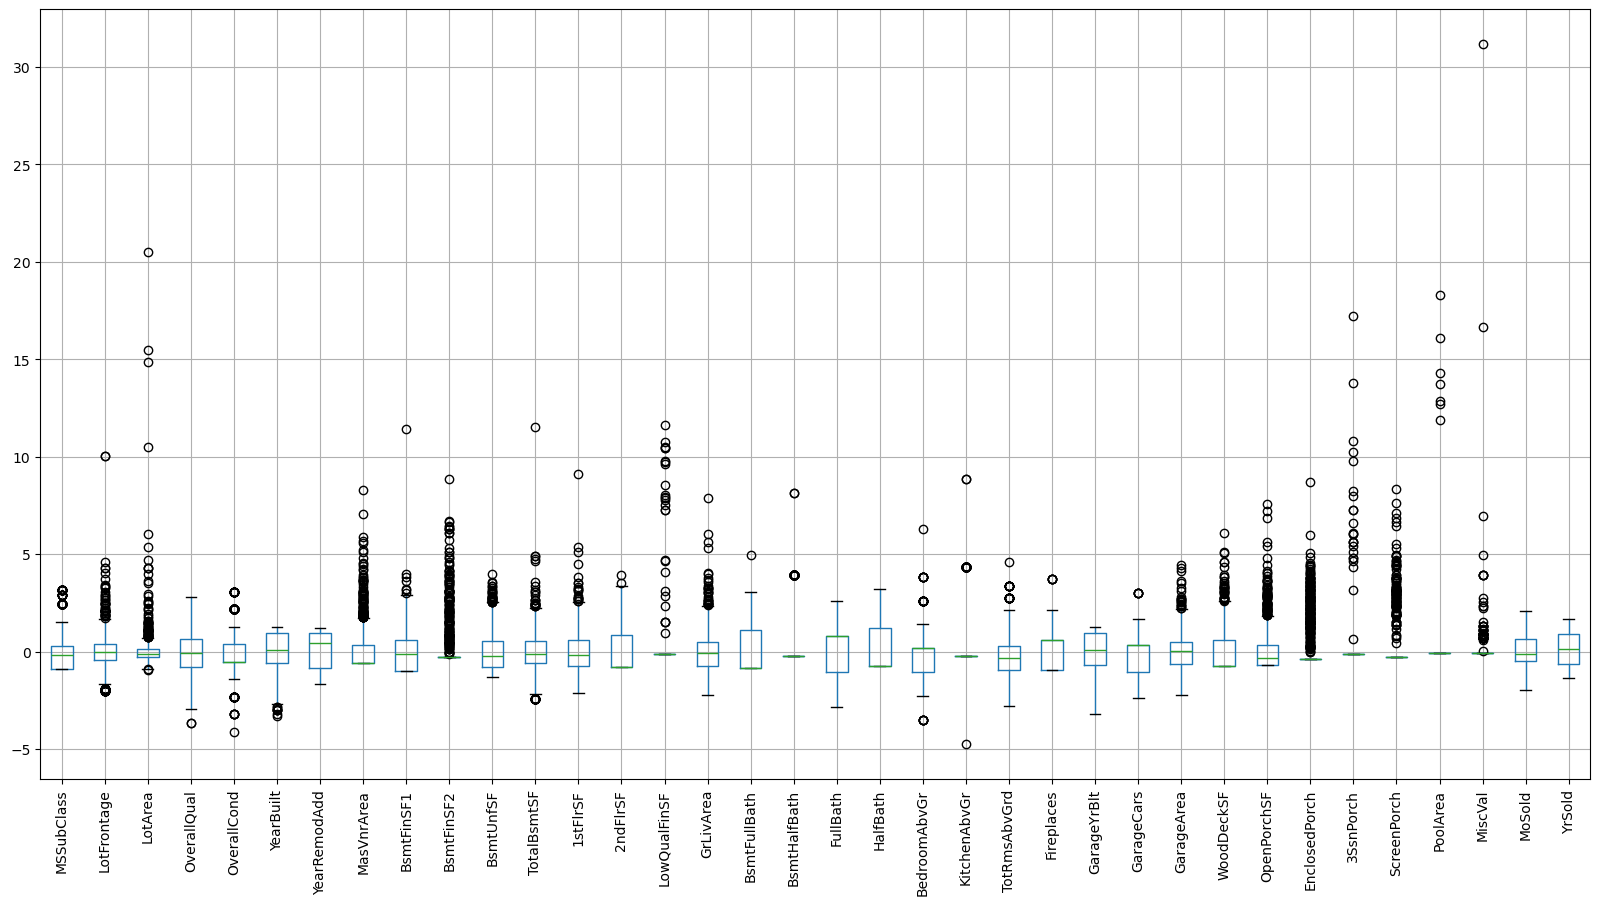

In [19]:
# TODO 4.2 Range - transform features by scaling each feature to a given range (range of the dataset) [1,5 Points]
# Display box plots of the scaled data frame to see results
# Display box plots of the scaled data frame to see results
scaled_dataframe.boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()


# Refrences where i got an head so in future i know where to look for similar solution 
# https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/

## 5. Data transformation [3 Points + 2 Bonus Points]

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
T

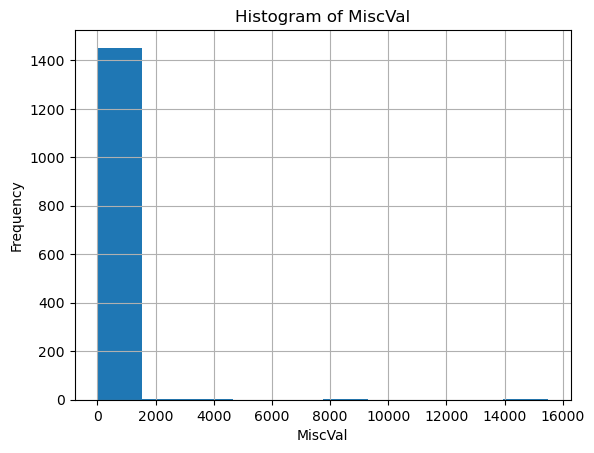

The most skewed is MiscVal


In [20]:
# TODO 5.1 Identify one skewed feature (or the one that is mostly skewed), calculate its skew factor, and display histogram of that feature only [1 Point]

# Tip - base your selection on the previously displayed histograms, and explain in one sentence your selection
# Tip - skew() method

# Select only numerical columns
numerical_columns = pandas_dataframe.select_dtypes(include=[np.number])

# Calculate skewness for numerical columns
skewness = numerical_columns.skew(axis=0, skipna=True)
print(skewness)

# Calculate skew factor for the most skewed feature
most_skewed_feature = skewness.idxmax()
skew_factor = numerical_columns[most_skewed_feature].skew()
print(f"Skew factor of {most_skewed_feature}: {skew_factor}")

# Display histogram of the most skewed feature
numerical_columns[most_skewed_feature].hist()
plt.title(f'Histogram of {most_skewed_feature}')
plt.xlabel(most_skewed_feature)
plt.ylabel('Frequency')
plt.show()

print(f'The most skewed is', most_skewed_feature)

# Explanation: The feature with the highest skew factor is selected based on its skewness, which indicates the asymmetry of the distribution.



The most skewed is MiscVal
New skew factor of MiscVal after log transform: 5.170703861673264


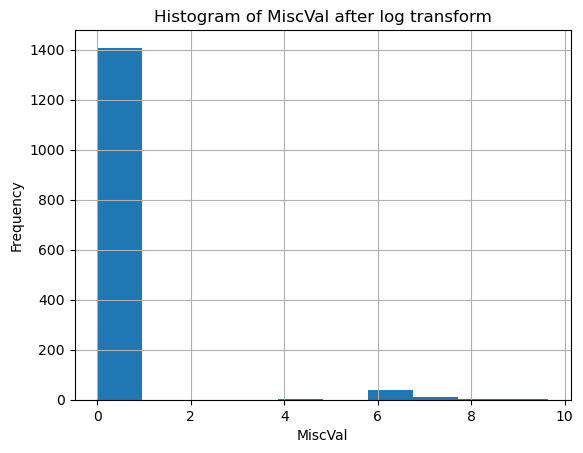

In [21]:
# TODO 5.2 Perform Log transform of that feature, calculate new skew factor, and display the new histogram of that feature [1 Point]
print(f'The most skewed is', most_skewed_feature)

# Apply log transformation to the most skewed feature
log_transformed_feature = np.log1p(numerical_columns[most_skewed_feature])

# Calculate the skew factor of the log-transformed feature
new_skew_factor = log_transformed_feature.skew()
print(f"New skew factor of {most_skewed_feature} after log transform: {new_skew_factor}")

# Display histogram of the log-transformed feature
log_transformed_feature.hist()
plt.title(f'Histogram of {most_skewed_feature} after log transform')
plt.xlabel(most_skewed_feature)
plt.ylabel('Frequency')
plt.show()

New skew factor of MiscVal after sqrt transform: 9.559130274695711


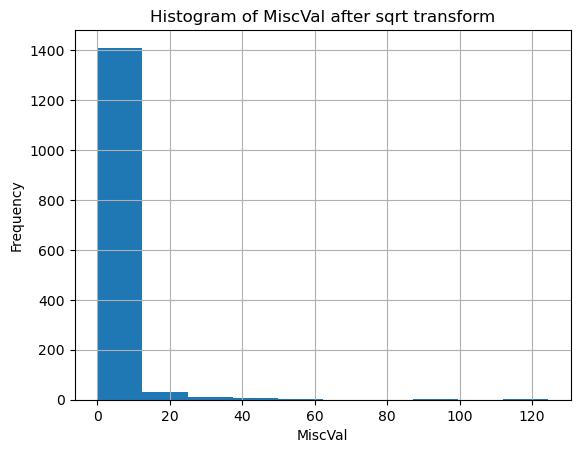

In [22]:
# TODO 5.3 Perform SQRT transform, calculate new skew factor, and display the new histogram of that feature [1 Point]
sqrt_transformed_feature = np.sqrt(numerical_columns[most_skewed_feature])

new_skew_factor = sqrt_transformed_feature.skew()
print(f"New skew factor of {most_skewed_feature} after sqrt transform: {new_skew_factor}")

sqrt_transformed_feature.hist()
plt.title(f'Histogram of {most_skewed_feature} after sqrt transform')
plt.xlabel(most_skewed_feature)
plt.ylabel('Frequency')
plt.show()

New skew factor of MiscVal after Box-Cox transform: 5.016527994711964


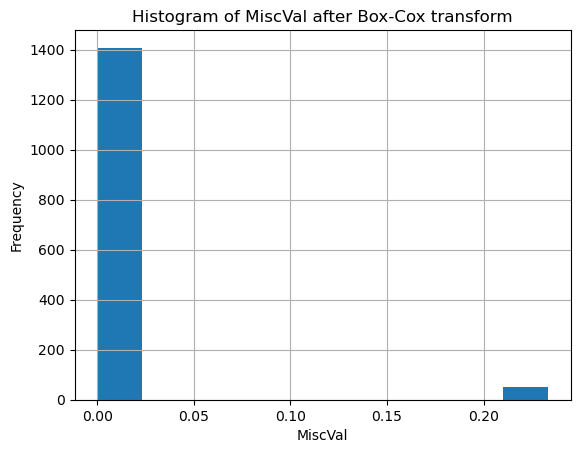

In [27]:
# TODO 5.4 Perform Box-Cox Transform, calculate new skew factor, and display the new histogram of that feature [2 Bonus Points]
# Explain in couple of sentences how this transformation works.
# Ensure all data is positive by adding a constant
positive_feature = numerical_columns[most_skewed_feature] + 1 - numerical_columns[most_skewed_feature].min()

# Apply Box-Cox transformation
boxcox = BoxCoxTransformer(variables=[most_skewed_feature])
boxcox.fit(positive_feature.to_frame())
boxcox_transformed_feature = boxcox.transform(positive_feature.to_frame())[most_skewed_feature]

# Calculate the skew factor of the Box-Cox transformed feature
new_skew_factor = boxcox_transformed_feature.skew()
print(f"New skew factor of {most_skewed_feature} after Box-Cox transform: {new_skew_factor}")

# Display histogram of the Box-Cox transformed feature
boxcox_transformed_feature.hist()
plt.title(f'Histogram of {most_skewed_feature} after Box-Cox transform')
plt.xlabel(most_skewed_feature)
plt.ylabel('Frequency')
plt.show()




